In [1]:
import warnings
warnings.filterwarnings('ignore')

## Dataset
- Bu veriseti Istanbulda her 5 dakikada kaydedilmiş olan trafik indekslerini içerir.
- İlgili günün resmi tatil, okul tatili veya haftasonuna denk gelip gelmediği bilgileri de mevcuttur.

In [2]:
import pandas as pd
df = pd.read_csv("./traffic_dataset.csv")
df

,Zaman Damgası,Trafik,Tarih,Saat,Ay,Gün,Ayın Günü,Tam Saat,Resmi Tatil,Okul Tatili,Haftasonu
0,2019-01-01 00:02:00.000,2.0,2019-01-01 00:00:00.000,00:02:00,Ocak,Salı,1,0,True,False,False
1,2019-01-01 00:07:00.000,4.0,2019-01-01 00:00:00.000,00:07:00,Ocak,Salı,1,0,True,False,False
2,2019-01-01 00:12:00.000,4.0,2019-01-01 00:00:00.000,00:12:00,Ocak,Salı,1,0,True,False,False
3,2019-01-01 00:17:09.030,4.0,2019-01-01 00:00:00.000,00:17:09,Ocak,Salı,1,0,True,False,False
4,2019-01-01 00:22:00.000,4.0,2019-01-01 00:00:00.000,00:22:00,Ocak,Salı,1,0,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
86977,2019-12-31 23:36:00.000,8.0,2019-12-31 00:00:00.000,23:36:00,Aralık,Salı,31,23,True,False,False
86978,2019-12-31 23:41:00.000,8.0,2019-12-31 00:00:00.000,23:41:00,Aralık,Salı,31,23,True,False,False
86979,2019-12-31 23:46:00.000,8.0,2019-12-31 00:00:00.000,23:46:00,Aralık,Salı,31,23,True,False,False
86980,2019-12-31 23:51:00.000,6.0,2019-12-31 00:00:00.000,23:51:00,Aralık,Salı,31,23,True,False,False


### Rastgele Örnekler

In [3]:
# lets see some example of the data.
IDX = 1578

for column in list(df.columns):
    print(f'{column}: {df.loc[IDX][column]}')

Zaman Damgası: 2019-01-06 11:53:00.000
Trafik: 4.0
Tarih: 2019-01-06 00:00:00.000
Saat: 11:53:00
Ay: Ocak
Gün: Pazar
Ayın Günü: 6
Tam Saat: 11
Resmi Tatil: False
Okul Tatili: False
Haftasonu: True


In [4]:
# example for April 23.
IDX = 30300

for column in list(df.columns):
    print(f'{column}: {df.loc[IDX][column]}')

Zaman Damgası: 2019-04-23 07:56:00.000
Trafik: 4.0
Tarih: 2019-04-23 00:00:00.000
Saat: 07:56:00
Ay: Nisan
Gün: Salı
Ayın Günü: 23
Tam Saat: 7
Resmi Tatil: True
Okul Tatili: False
Haftasonu: False


### Sütunlar

In [5]:
# get column names as list.
COLUMN_NAMES = list(df.columns)
COLUMN_NAMES

['Zaman Damgası',
 'Trafik',
 'Tarih',
 'Saat',
 'Ay',
 'Gün',
 'Ayın Günü',
 'Tam Saat',
 'Resmi Tatil',
 'Okul Tatili',
 'Haftasonu']

Şimdi sütunların neler içerdiğine bakalım.

In [6]:
# months
pd.unique(df['Ay'])

array(['Ocak', 'Şubat', 'Mart', 'Nisan', 'Mayıs', 'Haziran', 'Temmuz',
       'Eylül', 'Ekim', 'Kasım', 'Aralık'], dtype=object)

In [7]:
# days
pd.unique(df['Gün'])

array(['Salı', 'Çarşamba', 'Perşembe', 'Cuma', 'Cumartesi', 'Pazar',
       'Pazartesi'], dtype=object)

In [8]:
# days of the month
pd.unique(df['Ayın Günü'])

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [9]:
# exact hour.
pd.unique(df['Tam Saat'])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

Trafik verisi 1 ile 81 arasında normalize edilmiştir.

In [10]:
# traffic data.
df['Trafik'].describe()

count    86982.000000
mean        26.258281
std         18.501107
min          1.000000
25%          8.000000
50%         27.000000
75%         40.000000
max         81.000000
Name: Trafik, dtype: float64

In [11]:
# boolean columns
print(pd.unique(df["Resmi Tatil"]))
print(pd.unique(df["Okul Tatili"]))
print(pd.unique(df["Haftasonu"]))

[ True False]
[False  True]
[False  True]


Başlamadan önce yeni bir sütun ekleyelim, bu sütunu sonraki analizlerde sürekli kullanacağız.

In [12]:
sorter = ['Pazartesi', 'Salı', 'Çarşamba', 'Perşembe', 'Cuma', 'Cumartesi', 'Pazar']
sorter_idx = dict(zip(sorter,range(1, len(sorter) + 1)))  # start from 1 to 7.
sorter_idx

{'Pazartesi': 1,
 'Salı': 2,
 'Çarşamba': 3,
 'Perşembe': 4,
 'Cuma': 5,
 'Cumartesi': 6,
 'Pazar': 7}

In [13]:
df['Gün_Sırası'] = df.index
df['Gün_Sırası'] = df['Gün'].map(sorter_idx)
df.tail()

,Zaman Damgası,Trafik,Tarih,Saat,Ay,Gün,Ayın Günü,Tam Saat,Resmi Tatil,Okul Tatili,Haftasonu,Gün_Sırası
86977,2019-12-31 23:36:00.000,8.0,2019-12-31 00:00:00.000,23:36:00,Aralık,Salı,31,23,True,False,False,2
86978,2019-12-31 23:41:00.000,8.0,2019-12-31 00:00:00.000,23:41:00,Aralık,Salı,31,23,True,False,False,2
86979,2019-12-31 23:46:00.000,8.0,2019-12-31 00:00:00.000,23:46:00,Aralık,Salı,31,23,True,False,False,2
86980,2019-12-31 23:51:00.000,6.0,2019-12-31 00:00:00.000,23:51:00,Aralık,Salı,31,23,True,False,False,2
86981,2019-12-31 23:56:00.000,6.0,2019-12-31 00:00:00.000,23:56:00,Aralık,Salı,31,23,True,False,False,2


## Hipotezler
- Ekim ayının pazartesi günleri Haziran ayının Pazartesi günlerinden daha fazla trafik olur.
* Haftasonu sabahları haftaiçinden daha az trafik olur.
- Mesai saatlerinin bitişinde mesai saati başlangıcından daha çok trafik olur.
* Dün mesai çıkışı yaşanan trafik ortalaması 40 dan fazlaysa bir sonraki gün trafik azalır.
- Sesli harfle başlayan aylarda diğer aylara göre fazla tatil günü vardır.

## H1: Ekim ayının pazartesi günleri Haziran ayının pazartesi günlerinden daha fazla trafik olur.

In [14]:
def find_traffic(month_name, day_name):
    """Finds the traffic mean of the given day of the month.
    month_name (str) : name of the month that you want to calculate traffic mean.
    day_name (str)   : name of the month that you want to calculate traffic mean.
    """
    traffic_rates = []

    for idx, column in df.iterrows():
        if column['Ay'] == month_name:
            if column['Gün'] == day_name:
                traffic_rates.append(column['Trafik'])

    mean = sum(traffic_rates) / len(traffic_rates)
    return mean

In [15]:
october_mondays_traffic = find_traffic(month_name="Ekim", day_name="Pazartesi")
october_mondays_traffic

24.593298222527846

In [16]:
june_mondays_traffic = find_traffic(month_name="Haziran", day_name="Pazartesi")
june_mondays_traffic

21.15591860340837

In [17]:
import matplotlib.pyplot as plt

[0]


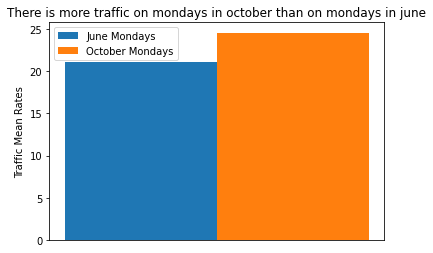

In [18]:
import numpy as np

N = 1

ind = np.arange(N)
print(ind)
width = 25
plt.bar(ind, june_mondays_traffic, width, label='June Mondays')
plt.bar(ind + width, october_mondays_traffic, width,
    label='October Mondays')

plt.ylabel("Traffic Mean Rates")
plt.title("There is more traffic on mondays in october than on mondays in june")

plt.xticks([])
plt.legend(loc='best')
plt.show()

**Görüldüğü üzere hipotez1 doğrudur.**

## H2: Haftasonu sabahları haftaiçinden daha az trafik olur.

In [19]:
# filtering for only weekdays.
weekday = df.loc[df['Haftasonu'] == False][['Tam Saat','Gün',"Haftasonu", "Trafik", "Gün_Sırası"]]

# I accept the morning hours as (7-8-9-10)
MORNING_HOURS = [7, 8, 9, 10]

# if the exact time (Tam Saat) column is in the range, then take it.
weekday_mornings = weekday[weekday["Tam Saat"].isin(MORNING_HOURS)].reset_index().drop('index', axis=1)
weekday_mornings

,Tam Saat,Gün,Haftasonu,Trafik,Gün_Sırası
0,7,Salı,False,4.0,2
1,7,Salı,False,2.0,2
2,7,Salı,False,4.0,2
3,7,Salı,False,4.0,2
4,7,Salı,False,6.0,2
...,...,...,...,...,...
10400,10,Salı,False,35.0,2
10401,10,Salı,False,35.0,2
10402,10,Salı,False,35.0,2
10403,10,Salı,False,35.0,2


In [20]:
# filtering for only weekend.
weekend = df.loc[df['Haftasonu'] == True][['Tam Saat','Gün',"Haftasonu", "Trafik", "Gün_Sırası"]]

# if the exact time (Tam Saat) column is in the range, then take it.
weekend_mornings = weekend[weekend["Tam Saat"].isin(MORNING_HOURS)].reset_index().drop('index', axis=1)
weekend_mornings

,Tam Saat,Gün,Haftasonu,Trafik,Gün_Sırası
0,7,Cumartesi,True,17.0,6
1,7,Cumartesi,True,17.0,6
2,7,Cumartesi,True,15.0,6
3,7,Cumartesi,True,17.0,6
4,7,Cumartesi,True,18.0,6
...,...,...,...,...,...
4086,10,Pazar,True,9.0,7
4087,10,Pazar,True,9.0,7
4088,10,Pazar,True,11.0,7
4089,10,Pazar,True,11.0,7


In [21]:
# lets check the days we selected for weekend and weekdays.
print("Weekday : ", pd.unique(weekday_mornings['Gün']))
print("Weekend : ", pd.unique(weekend_mornings['Gün']))

Weekday :  ['Salı' 'Çarşamba' 'Perşembe' 'Cuma' 'Pazartesi']
Weekend :  ['Cumartesi' 'Pazar']


In [22]:
# lets group and finish the process.
result_for_weekday = weekday_mornings.groupby(["Gün"]).mean().drop(["Tam Saat", "Haftasonu"], axis=1)
result_for_weekend = weekend_mornings.groupby(["Gün"]).mean().drop(["Tam Saat", "Haftasonu"], axis=1)

# combination of the days.
result = pd.concat([result_for_weekday, result_for_weekend])
result

,Trafik,Gün_Sırası
Gün,,
Cuma,40.373270,5.0
Pazartesi,38.345215,1.0
Perşembe,39.995013,4.0
Salı,38.359228,2.0
Çarşamba,39.989269,3.0
Cumartesi,19.106580,6.0
Pazar,6.226260,7.0


In [23]:
# lets sort them by using day_id
result.sort_values('Gün_Sırası', inplace=True)
result

,Trafik,Gün_Sırası
Gün,,
Pazartesi,38.345215,1.0
Salı,38.359228,2.0
Çarşamba,39.989269,3.0
Perşembe,39.995013,4.0
Cuma,40.373270,5.0
Cumartesi,19.106580,6.0
Pazar,6.226260,7.0


<AxesSubplot:ylabel='Trafik'>

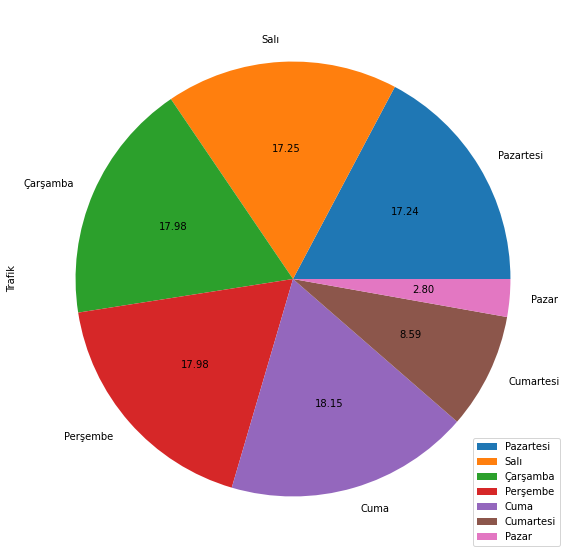

In [24]:
result.plot.pie(figsize=(10, 10), y="Trafik", autopct='%.2f')

In [25]:
# Visualization2

# visualize by day and all hours.
day_hour = df.groupby(["Gün", "Tam Saat", "Gün_Sırası"])["Trafik"].agg(["mean"])
day_hour.reset_index(inplace=True)

day_hour.sort_values("Gün_Sırası", inplace=True)
day_hour.reset_index(inplace=True, drop=True)

# pivotting for visualizing.
day_hour_pivot = day_hour.pivot(index="Gün_Sırası", columns="Tam Saat", values="mean")
day_hour_pivot = day_hour_pivot.sort_index()

In [26]:
import seaborn as sns

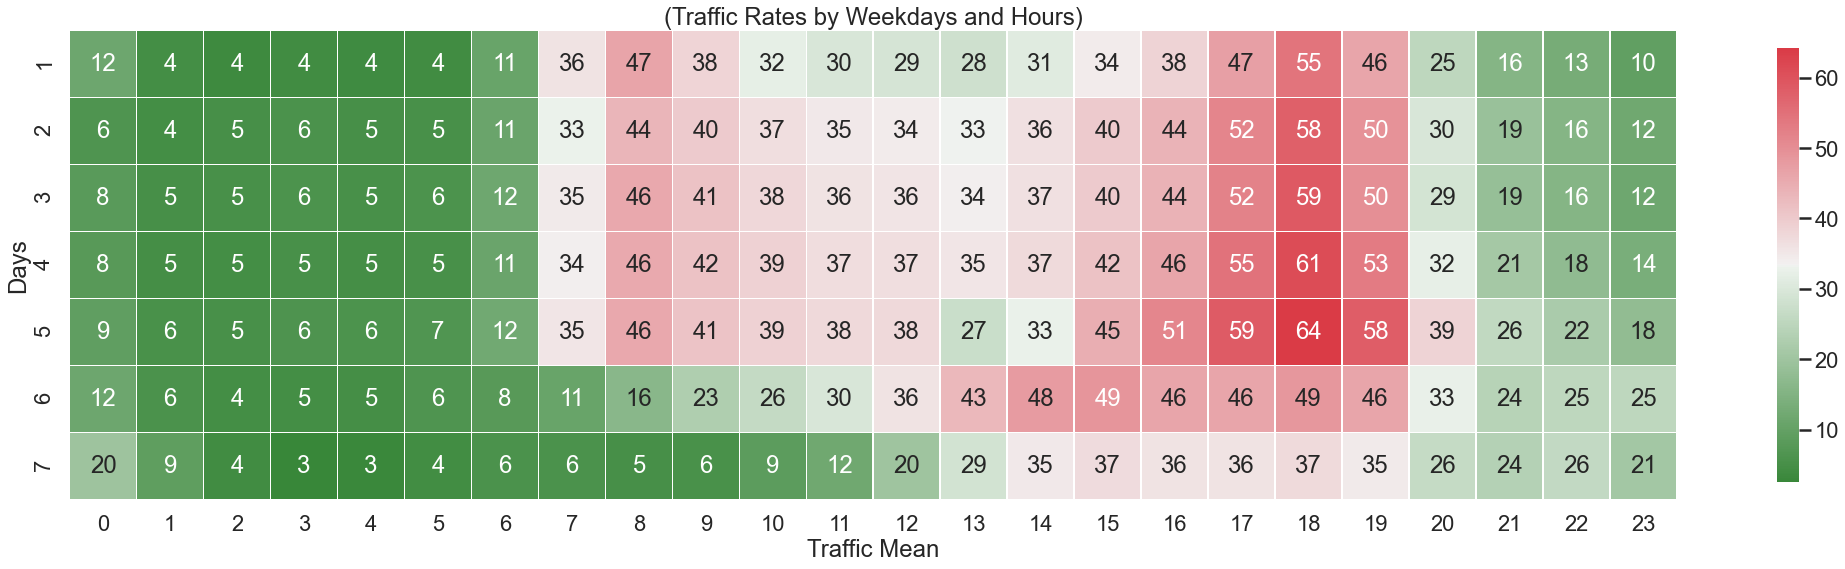

In [27]:
title = '(Traffic Rates by Weekdays and Hours)'
hm_pal = sns.diverging_palette(128, 10, s=75, l=50, center='light', as_cmap=True)
sns.set(context='poster')
# Heatmap
f, ax = plt.subplots(figsize=(36, 32))
p = sns.heatmap(day_hour_pivot, 
            annot=True,   # put values into cells
            linewidths=.5, 
            cmap=hm_pal, 
            square=True,
            cbar=True,
            cbar_kws={"shrink": .25},
            fmt='.0f',  # string format.
            ax=ax)
# set title
p.set_title(title, fontsize=24)

leftx = plt.xlim()[0]
bottomy = plt.ylim()[0] - ((plt.ylim()[1] - plt.ylim()[0]) * 0.15)
bottomy2 = plt.ylim()[0] - ((plt.ylim()[1] - plt.ylim()[0]) * 0.20)

# Ay ve gün demeye gerek yok boşu boşuna. Temizleyelim.
p.set(ylabel="Days", xlabel="Traffic Mean")

plt.show()

**Hipotez2 kesinlikle doğru!**

## H3: Mesai saatlerinin bitişinde mesai saati başlangıcından daha çok trafik olur.

- Sadece haftaiçi günlerinde mesai saatlerine bakıyorum.
- Mesai başlangıç saatleri : 7-8-9
- Mesai bitiş saatleri : 16-17-18

In [28]:
weekday = df.loc[df['Haftasonu'] == False][['Tam Saat','Gün',"Haftasonu", "Trafik", "Gün_Sırası"]]

MORNING_HOURS = [7, 8, 9]

weekday_mornings = weekday[weekday["Tam Saat"].isin(MORNING_HOURS)].reset_index().drop('index', axis=1)

# lets group them by days and get the mean.
result1 = weekday_mornings.groupby(['Gün', "Gün_Sırası"])["Trafik"].agg(["mean"]).reset_index()

# lets sort them by using day_id
result1.sort_values('Gün_Sırası', inplace=True)
result1.reset_index(inplace=True, drop=True)
result1

,Gün,Gün_Sırası,mean
0,Pazartesi,1,40.364530
1,Salı,2,38.892644
2,Çarşamba,3,40.703520
3,Perşembe,4,40.400889
4,Cuma,5,40.853783


In [29]:
EVENING = [16, 17, 18]

# using exact hours, I can easily filter them with using morning hours.
weekday_evenings = weekday[weekday["Tam Saat"].isin(EVENING)].reset_index().drop('index', axis=1)

# lets group them by days and get the mean.
result2 = weekday_evenings.groupby(['Gün', "Gün_Sırası"])["Trafik"].agg(["mean"]).reset_index()

# lets sort them by using day_id
result2.sort_values('Gün_Sırası', inplace=True)
result2.reset_index(inplace=True, drop=True)
result2

,Gün,Gün_Sırası,mean
0,Pazartesi,1,46.756975
1,Salı,2,51.222401
2,Çarşamba,3,51.753778
3,Perşembe,4,54.023529
4,Cuma,5,58.107407


In [30]:
# lets compare 5 days by their meanings.
result = result1.compare(result2)['mean'].rename(columns={'self':'Mesai Baslangıç', 'other':'Mesai Bitiş'})

In [31]:
# lets combine them.
days = result1["Gün"]
result = result.join(days)
result

,Mesai Baslangıç,Mesai Bitiş,Gün
0,40.364530,46.756975,Pazartesi
1,38.892644,51.222401,Salı
2,40.703520,51.753778,Çarşamba
3,40.400889,54.023529,Perşembe
4,40.853783,58.107407,Cuma


### Visualization

<AxesSubplot:ylabel='Gün'>

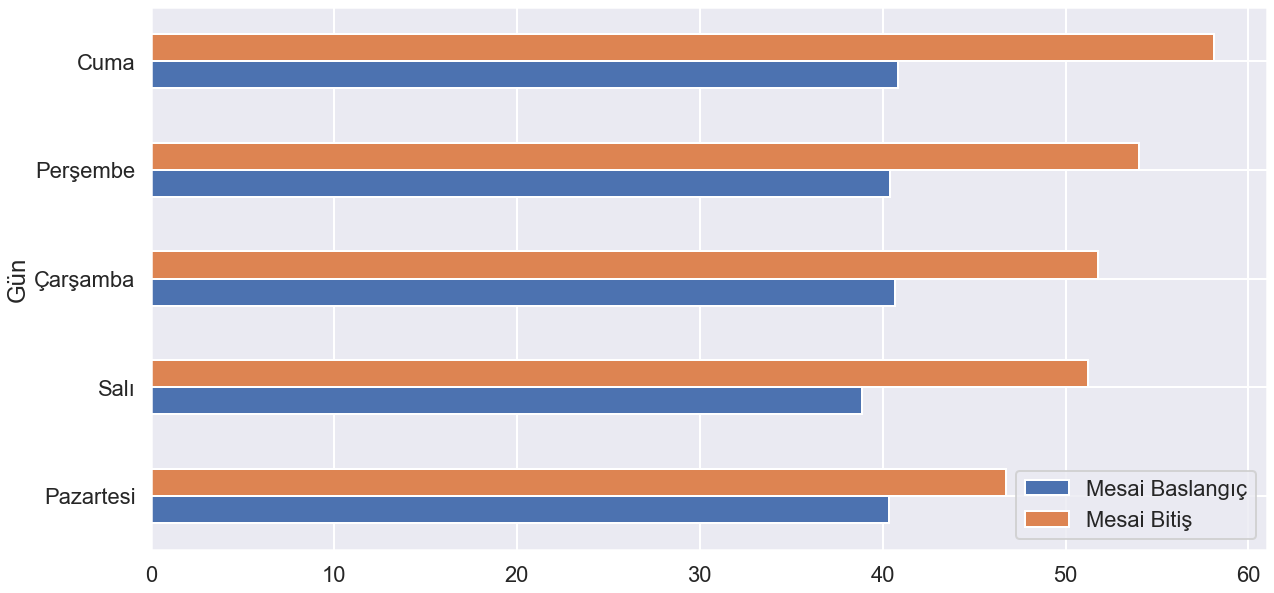

In [32]:
FIGURE_SIZE = (20,10)
result.plot.barh(x="Gün", figsize=FIGURE_SIZE)

**Hipotez3 doğru!**

## H4: Dün mesai çıkışı yaşanan trafik ortalaması 40 dan fazlaysa bir sonraki gün trafik azalır.

### Önemli
- **Öncelikle sadece çalışma günlerini önemsediğimi söylemeliyim. Sonrasında ilgili günün sonrası da bir çalışma günü olmalı ki mantıklı bir analiz olsun**.
- Yani benim günlerim "Pazartesi, Salı, Çarşamba ve Perşembe" iken sonraki günlerim "Salı, Çarşamba, Perşembe ve Cuma" olabilir.
- Aynı zamanda sadece mesai saatinin bitişini kabul ediyorum.

In [33]:
# lets get the weekdays first.
weekday = df.loc[df['Haftasonu'] == False][['Tam Saat','Gün', "Trafik", "Ayın Günü", "Ay", 'Resmi Tatil', "Gün_Sırası"]]

# remove the holidays too.
weekday_no_holiday = weekday.loc[weekday['Resmi Tatil'] == False].drop(['Resmi Tatil'], axis=1)

# my days.
DAYS_BEFORE = ['Pazartesi', 'Salı', "Çarşamba", "Perşembe"]

#filtering by these days.
weekday_days_before = weekday_no_holiday[weekday_no_holiday["Gün"].isin(DAYS_BEFORE)]

# selecting only 40 or bigger traffic.
weekday_days_before_bigger_40_traffic = weekday_days_before[weekday_days_before['Trafik'] > 40].reset_index()
weekday_days_before_bigger_40_traffic

,index,Tam Saat,Gün,Trafik,Ayın Günü,Ay,Gün_Sırası
0,378,7,Çarşamba,42.0,2,Ocak,3
1,379,7,Çarşamba,45.0,2,Ocak,3
2,380,7,Çarşamba,45.0,2,Ocak,3
3,381,7,Çarşamba,49.0,2,Ocak,3
4,382,7,Çarşamba,51.0,2,Ocak,3
...,...,...,...,...,...,...,...
12601,86650,20,Pazartesi,47.0,30,Aralık,1
12602,86651,20,Pazartesi,45.0,30,Aralık,1
12603,86652,20,Pazartesi,44.0,30,Aralık,1
12604,86653,20,Pazartesi,44.0,30,Aralık,1


In [34]:
# thinking only these hours.
EVENING = [16, 17, 18]
weekday_days_before_bigger_40_traffic_before_evenings = weekday_days_before_bigger_40_traffic[weekday_days_before_bigger_40_traffic['Tam Saat'].isin(EVENING)].reset_index().drop(['index',"level_0"], axis=1)
weekday_days_before_bigger_40_traffic_before_evenings

,Tam Saat,Gün,Trafik,Ayın Günü,Ay,Gün_Sırası
0,17,Çarşamba,42.0,2,Ocak,3
1,17,Çarşamba,45.0,2,Ocak,3
2,17,Çarşamba,45.0,2,Ocak,3
3,17,Çarşamba,47.0,2,Ocak,3
4,17,Çarşamba,47.0,2,Ocak,3
...,...,...,...,...,...,...
5033,18,Pazartesi,71.0,30,Aralık,1
5034,18,Pazartesi,69.0,30,Aralık,1
5035,18,Pazartesi,69.0,30,Aralık,1
5036,18,Pazartesi,71.0,30,Aralık,1


In [35]:
# lets check the days we are using.
pd.unique(weekday_days_before_bigger_40_traffic_before_evenings['Gün'])

array(['Çarşamba', 'Perşembe', 'Pazartesi', 'Salı'], dtype=object)

In [36]:
# grouping them with the day-mounth-dayofthemount and the mean.
result1 = weekday_days_before_bigger_40_traffic_before_evenings.groupby(['Gün', 'Ay', 'Ayın Günü', 'Gün_Sırası'])["Trafik"].agg(["mean"]).reset_index()

# lets sorting them by mounth and the day of the mounth.
result1.sort_values(by=['Ay', 'Ayın Günü'], inplace=True)    
result1

,Gün,Ay,Ayın Günü,Gün_Sırası,mean
0,Pazartesi,Aralık,2,1,58.800000
81,Salı,Aralık,3,2,63.388889
120,Çarşamba,Aralık,4,3,60.916667
39,Perşembe,Aralık,5,4,65.666667
1,Pazartesi,Aralık,9,1,54.303030
...,...,...,...,...,...
79,Perşembe,Şubat,21,4,53.088235
38,Pazartesi,Şubat,25,1,46.650000
119,Salı,Şubat,26,2,51.464286
162,Çarşamba,Şubat,27,3,62.638889


In [37]:
# lets find the candidate days of the result days above.
DAYS_AFTER = ['Salı', "Çarşamba", "Perşembe", "Cuma"]

# filtering only for these days.
weekday_days_after = weekday_no_holiday[weekday_no_holiday["Gün"].isin(DAYS_AFTER)]
weekday_days_after

,Tam Saat,Gün,Trafik,Ayın Günü,Ay,Gün_Sırası
288,0,Çarşamba,6.0,2,Ocak,3
289,0,Çarşamba,6.0,2,Ocak,3
290,0,Çarşamba,4.0,2,Ocak,3
291,0,Çarşamba,6.0,2,Ocak,3
292,0,Çarşamba,4.0,2,Ocak,3
...,...,...,...,...,...,...
85826,23,Cuma,17.0,27,Aralık,5
85827,23,Cuma,17.0,27,Aralık,5
85828,23,Cuma,17.0,27,Aralık,5
85829,23,Cuma,17.0,27,Aralık,5


In [38]:
# caring only these hours.
EVENING = [16, 17, 18]
weekday_days_after_evenings = weekday_days_after[weekday_days_after['Tam Saat'].isin(EVENING)].reset_index().drop(['index'], axis=1)
weekday_days_after_evenings

,Tam Saat,Gün,Trafik,Ayın Günü,Ay,Gün_Sırası
0,16,Çarşamba,33.0,2,Ocak,3
1,16,Çarşamba,33.0,2,Ocak,3
2,16,Çarşamba,33.0,2,Ocak,3
3,16,Çarşamba,33.0,2,Ocak,3
4,16,Çarşamba,33.0,2,Ocak,3
...,...,...,...,...,...,...
5959,18,Cuma,78.0,27,Aralık,5
5960,18,Cuma,78.0,27,Aralık,5
5961,18,Cuma,78.0,27,Aralık,5
5962,18,Cuma,78.0,27,Aralık,5


In [39]:
# grouping them with the day-mounth-dayofthemount and the mean.
result2 = weekday_days_after_evenings.groupby(['Gün', 'Ay', 'Ayın Günü', "Gün_Sırası"])["Trafik"].agg(["mean"]).reset_index()

# lets sorting them by mounth and the day of the mounth.
result2.sort_values(by=['Ay', 'Ayın Günü'], inplace=True)

In [40]:
# drop unnesseary column.
result1 = result1.reset_index().drop(['index'], axis=1)
result2 = result2.reset_index().drop(['index'], axis=1)

In [41]:
result1

,Gün,Ay,Ayın Günü,Gün_Sırası,mean
0,Pazartesi,Aralık,2,1,58.800000
1,Salı,Aralık,3,2,63.388889
2,Çarşamba,Aralık,4,3,60.916667
3,Perşembe,Aralık,5,4,65.666667
4,Pazartesi,Aralık,9,1,54.303030
...,...,...,...,...,...
158,Perşembe,Şubat,21,4,53.088235
159,Pazartesi,Şubat,25,1,46.650000
160,Salı,Şubat,26,2,51.464286
161,Çarşamba,Şubat,27,3,62.638889


In [42]:
result2

,Gün,Ay,Ayın Günü,Gün_Sırası,mean
0,Salı,Aralık,3,2,63.388889
1,Çarşamba,Aralık,4,3,60.916667
2,Perşembe,Aralık,5,4,65.666667
3,Cuma,Aralık,6,5,65.944444
4,Salı,Aralık,10,2,57.388889
...,...,...,...,...,...
162,Perşembe,Şubat,21,4,52.361111
163,Cuma,Şubat,22,5,53.138889
164,Salı,Şubat,26,2,48.583333
165,Çarşamba,Şubat,27,3,62.638889


In [43]:
# lets develop a function for iterating all the days and finding the next day's traffic mean.
def find_next_day_traffic(row, tomorrow_df):
        month = row['Ay']
        month_day = row["Ayın Günü"]
        try:
            # get the mean of next day using tomorrow dataseries.
            mean = tomorrow_df.loc[(tomorrow_df["Ay"] == month) & (tomorrow_df["Ayın Günü"] == month_day + 1)]['mean'].values[0]
        except: # there could be a holiday or bad data, so simply put a 0 for them.
            return 0
        return mean

In [44]:
# creating another column for that
result1['next_day_traffic_mean'] = result1.apply(lambda x: find_next_day_traffic(x, result2), axis=1)

In [45]:
# remove the 0 traffic mean.
result = result1[result1['next_day_traffic_mean'] > 0]
result

,Gün,Ay,Ayın Günü,Gün_Sırası,mean,next_day_traffic_mean
0,Pazartesi,Aralık,2,1,58.800000,63.388889
1,Salı,Aralık,3,2,63.388889,60.916667
2,Çarşamba,Aralık,4,3,60.916667,65.666667
3,Perşembe,Aralık,5,4,65.666667,65.944444
4,Pazartesi,Aralık,9,1,54.303030,57.388889
...,...,...,...,...,...,...
157,Çarşamba,Şubat,20,3,52.843750,52.361111
158,Perşembe,Şubat,21,4,53.088235,53.138889
159,Pazartesi,Şubat,25,1,46.650000,48.583333
160,Salı,Şubat,26,2,51.464286,62.638889


 ## H4 Görselleştirme

In [46]:
result = result[["mean", "next_day_traffic_mean"]]

In [47]:
# renaming the columns for better understanding.
result.rename(columns={"mean": "today_traffic_mean"}, inplace=True)

In [48]:
result

,today_traffic_mean,next_day_traffic_mean
0,58.800000,63.388889
1,63.388889,60.916667
2,60.916667,65.666667
3,65.666667,65.944444
4,54.303030,57.388889
...,...,...
157,52.843750,52.361111
158,53.088235,53.138889
159,46.650000,48.583333
160,51.464286,62.638889


In [49]:
# lets find difference between the days and the days after.
sum_result = sum(list(result["today_traffic_mean"] - result["next_day_traffic_mean"]))

sum_result

-207.73433091418102

**Hipotez4 yanlış!**

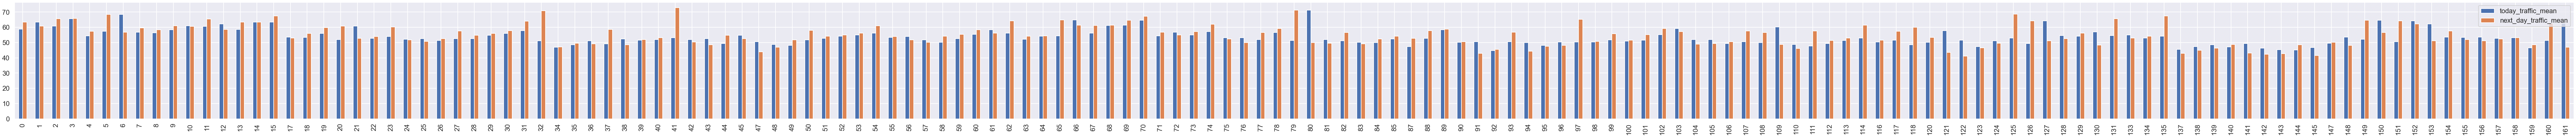

In [50]:
result.plot.bar(figsize=(150,7));

## H5: Sesli harfle başlayan aylarda diğer aylara göre fazla tatil günü vardır.

In [51]:
# get all the mount names as python list.
mounth_list = list(pd.unique(df['Ay']))
mounth_list

['Ocak',
 'Şubat',
 'Mart',
 'Nisan',
 'Mayıs',
 'Haziran',
 'Temmuz',
 'Eylül',
 'Ekim',
 'Kasım',
 'Aralık']

In [52]:
# now we will write a regular expression for finding the mounth that starts with a vowel.

import re

first_list = [] # starting with vowel.
second_list = [] # not starting with vowel.

for x in mounth_list:
    if re.match("^[aeıioöuüAEIİOÖUÜ]",x):
        first_list.append(x)
    else:
        second_list.append(x)

In [53]:
first_list

['Ocak', 'Eylül', 'Ekim', 'Aralık']

In [54]:
second_list

['Şubat', 'Mart', 'Nisan', 'Mayıs', 'Haziran', 'Temmuz', 'Kasım']

In [55]:
# find the holidays on these days.

In [56]:
# for vowel list.
vowel_months = df[df["Ay"].isin(first_list)]

# get only necessary columns.
vowel_months = vowel_months[["Ay", "Resmi Tatil", "Okul Tatili", "Ayın Günü"]]
vowel_months.reset_index(inplace=True) # reindexing should be.

vowel_months.drop('index', axis=1, inplace=True) # drop the index column.

In [57]:
# for other month list.
other_months = df[df["Ay"].isin(second_list)]

# get only necessary columns.
other_months = other_months[["Ay", "Resmi Tatil", "Okul Tatili", "Ayın Günü"]]

other_months.reset_index(inplace=True)  # reindexing should be.

other_months.drop('index', axis=1,inplace=True) # drop the index column.

In [58]:
vowel_months

,Ay,Resmi Tatil,Okul Tatili,Ayın Günü
0,Ocak,True,False,1
1,Ocak,True,False,1
2,Ocak,True,False,1
3,Ocak,True,False,1
4,Ocak,True,False,1
...,...,...,...,...
32754,Aralık,True,False,31
32755,Aralık,True,False,31
32756,Aralık,True,False,31
32757,Aralık,True,False,31


In [59]:
other_months

,Ay,Resmi Tatil,Okul Tatili,Ayın Günü
0,Şubat,False,True,1
1,Şubat,False,True,1
2,Şubat,False,True,1
3,Şubat,False,True,1
4,Şubat,False,True,1
...,...,...,...,...
54218,Kasım,False,False,30
54219,Kasım,False,False,30
54220,Kasım,False,False,30
54221,Kasım,False,False,30


In [60]:
# lets group them by month and the day of the month for both.
vowel_months_holidays = vowel_months.groupby(["Ay","Ayın Günü"]).mean().reset_index()
other_months_holidays = other_months.groupby(["Ay","Ayın Günü"]).mean().reset_index()

In [61]:
vowel_months_holidays

,Ay,Ayın Günü,Resmi Tatil,Okul Tatili
0,Aralık,1,False,False
1,Aralık,2,False,False
2,Aralık,3,False,False
3,Aralık,4,False,False
4,Aralık,5,False,False
...,...,...,...,...
110,Ocak,27,False,True
111,Ocak,28,False,True
112,Ocak,29,False,True
113,Ocak,30,False,True


In [62]:
other_months_holidays

,Ay,Ayın Günü,Resmi Tatil,Okul Tatili
0,Haziran,1,False,False
1,Haziran,2,False,False
2,Haziran,3,True,False
3,Haziran,4,True,False
4,Haziran,5,True,False
...,...,...,...,...
188,Şubat,24,False,False
189,Şubat,25,False,False
190,Şubat,26,False,False
191,Şubat,27,False,False


In [63]:
# keep only the holidays. (global holiday or school holiday)
vowel_months_holidays = vowel_months_holidays[(vowel_months_holidays['Resmi Tatil'] == True) | (vowel_months_holidays['Okul Tatili'] == True)]
vowel_months_holidays.reset_index()

,index,Ay,Ayın Günü,Resmi Tatil,Okul Tatili
0,30,Aralık,31,True,False
1,58,Ekim,28,True,False
2,59,Ekim,29,True,False
3,84,Ocak,1,True,False
4,102,Ocak,19,False,True
5,103,Ocak,20,False,True
6,104,Ocak,21,False,True
7,105,Ocak,22,False,True
8,106,Ocak,23,False,True
9,107,Ocak,24,False,True


In [64]:
# keep only the holidays. (global holiday or school holiday)
other_months_holidays = other_months_holidays[(other_months_holidays['Resmi Tatil'] == True) | (other_months_holidays['Okul Tatili'] == True)]
other_months_holidays.reset_index()

,index,Ay,Ayın Günü,Resmi Tatil,Okul Tatili
0,2,Haziran,3,True,False
1,3,Haziran,4,True,False
2,4,Haziran,5,True,False
3,5,Haziran,6,True,False
4,14,Haziran,15,False,True
5,15,Haziran,16,False,True
6,16,Haziran,17,False,True
7,17,Haziran,18,False,True
8,18,Haziran,19,False,True
9,19,Haziran,20,False,True


In [65]:
# combine these two.

In [66]:
r1 = vowel_months_holidays.groupby("Ay").sum().drop("Ayın Günü", axis=1)
r1

,Resmi Tatil,Okul Tatili
Ay,,
Aralık,1,0
Ekim,2,0
Ocak,1,13


In [67]:
r2 = other_months_holidays.groupby("Ay").sum().drop("Ayın Günü", axis=1)
r2

,Resmi Tatil,Okul Tatili
Ay,,
Haziran,4,16
Kasım,0,9
Mayıs,2,0
Nisan,1,0
Temmuz,1,18
Şubat,0,3


In [68]:
# combination of these 2.
result = pd.concat([r1, r2])
result

,Resmi Tatil,Okul Tatili
Ay,,
Aralık,1,0
Ekim,2,0
Ocak,1,13
Haziran,4,16
Kasım,0,9
Mayıs,2,0
Nisan,1,0
Temmuz,1,18
Şubat,0,3


## Visualization

<AxesSubplot:title={'center':'Aylara Göre Okul Tatil Oranları'}, ylabel='Okul Tatili'>

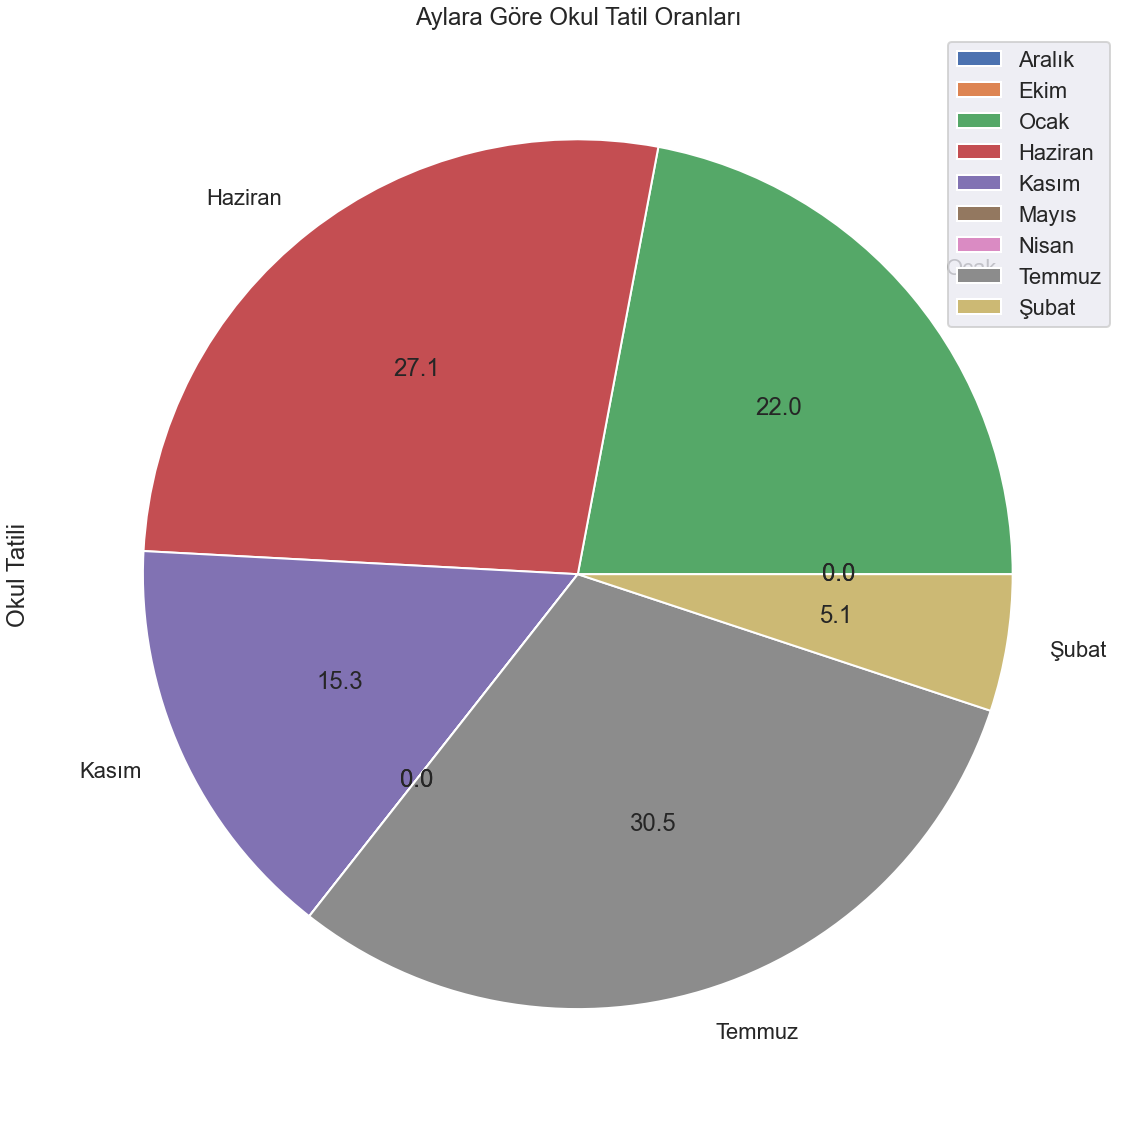

In [69]:
result.plot.pie(title="Aylara Göre Okul Tatil Oranları",
                x="Ay", y="Okul Tatili",
                figsize=(20, 20), autopct='%.1f')


array([<AxesSubplot:ylabel='Resmi Tatil'>], dtype=object)

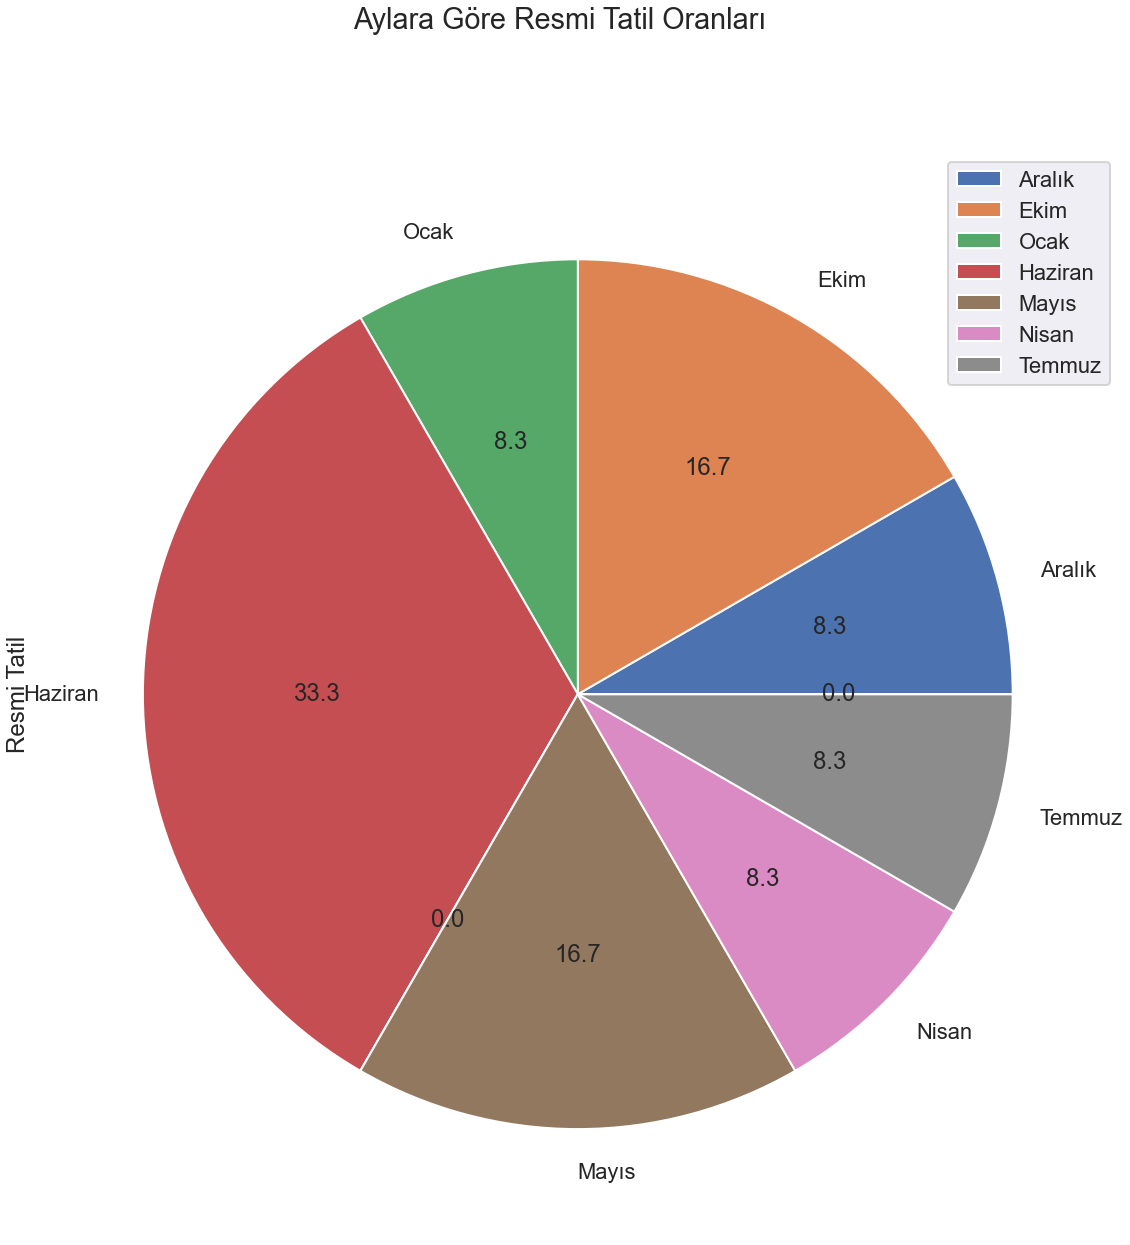

In [70]:
result.plot.pie(title="Aylara Göre Resmi Tatil Oranları",
              x="Ay", y="Resmi Tatil",
              figsize=(20, 20), subplots=True, autopct='%.1f')

In [71]:
#lets combine global and school holidays.
result["Toplam Tatil Günü"]= result["Resmi Tatil"] + result["Okul Tatili"]
result

,Resmi Tatil,Okul Tatili,Toplam Tatil Günü
Ay,,,
Aralık,1,0,1
Ekim,2,0,2
Ocak,1,13,14
Haziran,4,16,20
Kasım,0,9,9
Mayıs,2,0,2
Nisan,1,0,1
Temmuz,1,18,19
Şubat,0,3,3


In [72]:
# drop the others.
result.drop(["Resmi Tatil", "Okul Tatili"], axis=1, inplace=True)
result

,Toplam Tatil Günü
Ay,
Aralık,1
Ekim,2
Ocak,14
Haziran,20
Kasım,9
Mayıs,2
Nisan,1
Temmuz,19
Şubat,3


In [73]:
result

,Toplam Tatil Günü
Ay,
Aralık,1
Ekim,2
Ocak,14
Haziran,20
Kasım,9
Mayıs,2
Nisan,1
Temmuz,19
Şubat,3


array([<AxesSubplot:ylabel='Toplam Tatil Günü'>], dtype=object)

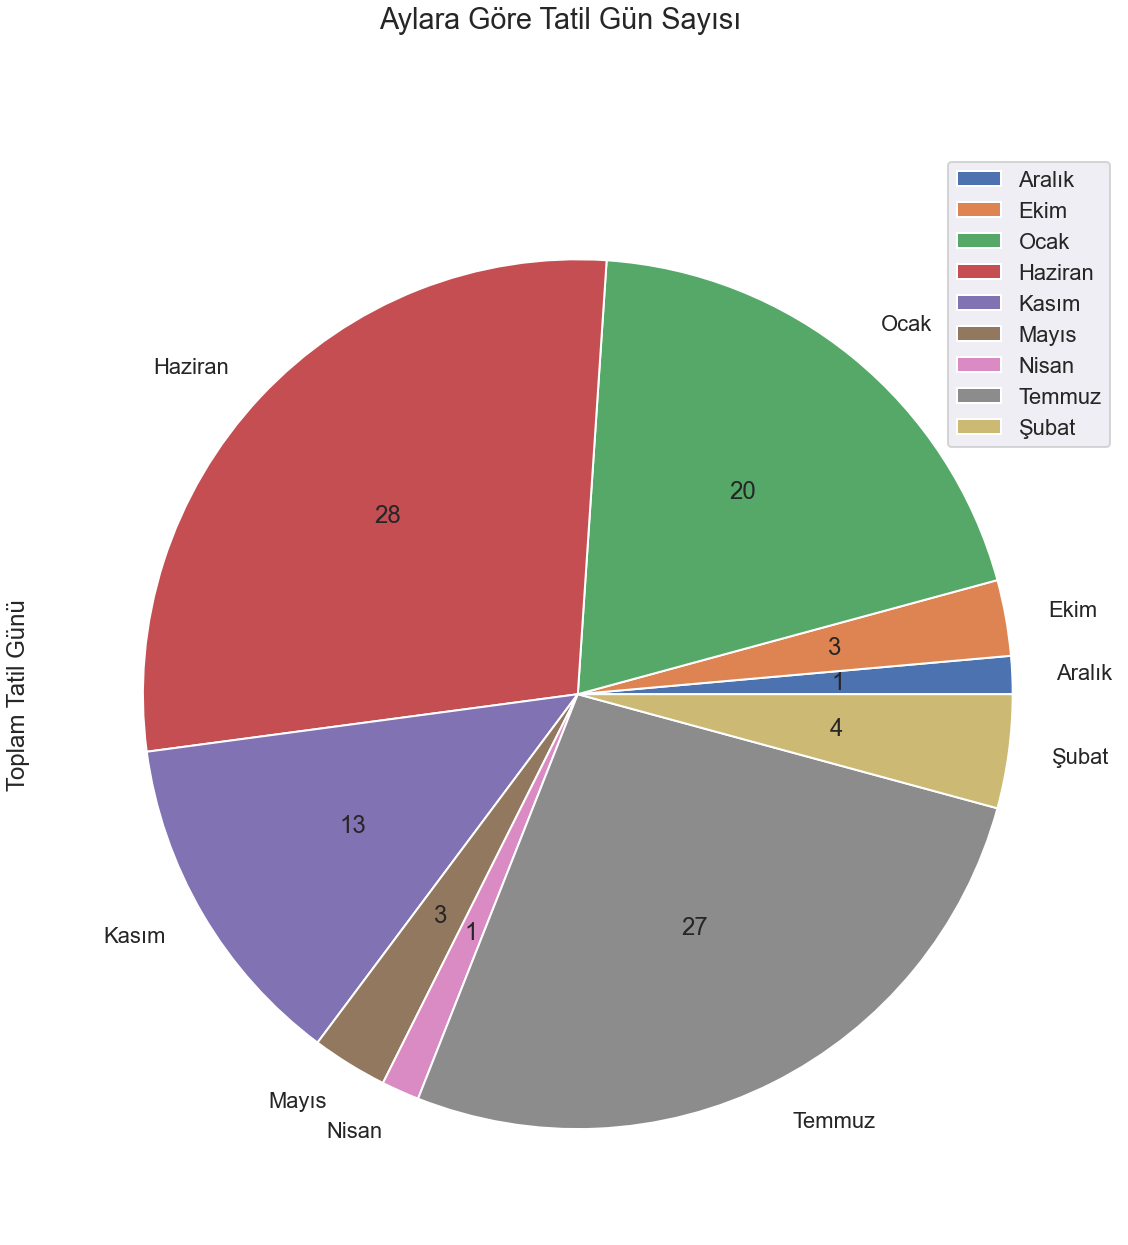

In [74]:
result.plot.pie(title="Aylara Göre Tatil Gün Sayısı", figsize=(20, 20), autopct='%.0f', subplots=True)

## References
- https://data.ibb.gov.tr/dataset
- https://pandas.pydata.org/pandas-docs/stable/index.html
- https://github.com/skurmus/2019istanbultrafikverisi
* https://realpython.com/ggplot-python/
- https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot